## Example d'interface : rotation de la carte
Permet de tourner la carte selon un angle donné.

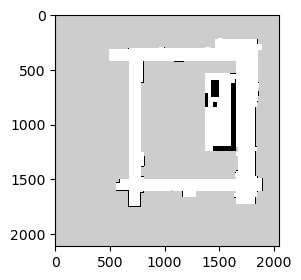

In [2]:
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.patches import Rectangle


# Initialisation de la carte
img = mpimg.imread("../Maps/a2230_map_closed.png")

# Définit la liste des salles et leurs coordonnées dans la carte
dict_salles = {
    1: {'pos': [0, 0], 'w': 100, 'h': 100, 'color': 'red'},
    2: {'pos': [300, 0], 'w': 10, 'h': 100, 'color': 'blue'},
    3: {'pos': [50, 250], 'w': 40, 'h': 40, 'color': 'gray'},
    4: {'pos': [0, 70], 'w': 100, 'h': 60, 'color': 'yellow'}
}

# Création de la fenêtre Tkinter
root = tk.Tk()
root.title("Room Selector")

# Fonction pour dessiner un rectangle sur la carte
def drawover_map(room, add_rect=True):
    # Display the image once and keep it static
    ax.imshow(img)
    if add_rect:
        rect = Rectangle(dict_salles[room]['pos'], dict_salles[room]['w'], dict_salles[room]['h'], color=dict_salles[room]['color'])
        ax.add_patch(rect)
    canvas.draw()  # Update the canvas

# Fonction appelée lorsque le menu déroulant est utilisé
def on_room_select(event):
    room = int(room_dropdown.get())  # Get the selected room number
    drawover_map(room, add_rect=True)

# Initialisation de la figure Matplotlib
fig, ax = plt.subplots(figsize=(6,3))

# Create the canvas and add it to the Tkinter window
canvas = FigureCanvasTkAgg(fig, master=root)
canvas.get_tk_widget().pack()

# Création du menu déroulant
room_dropdown = ttk.Combobox(root, values=list(dict_salles.keys()))
room_dropdown.set(1)  # Default to room 1
room_dropdown.bind('<<ComboboxSelected>>', on_room_select)
room_dropdown.pack()

# Lancer l'interface Tkinter
drawover_map(1, add_rect=False)  # Initially display the image without drawing a rectangle
root.mainloop()
